In [1]:
import numpy as np  
import pandas as pd                
import seaborn as sns               
import matplotlib.pyplot as plt             
         

In [2]:
df = pd.read_csv("mydrone_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time(millisecond)                            8127 non-null   int64  
 1   datetime(utc)                                8127 non-null   object 
 2   latitude                                     8127 non-null   float64
 3   longitude                                    8127 non-null   float64
 4   height_above_takeoff(feet)                   8127 non-null   float64
 5   height_above_ground_at_drone_location(feet)  8127 non-null   float64
 6   ground_elevation_at_drone_location(feet)     8127 non-null   float64
 7   altitude_above_seaLevel(feet)                8127 non-null   float64
 8   height_sonar(feet)                           8127 non-null   int64  
 9   speed(mph)                                   8127 non-null   float64
 10  

In [3]:
for col in df.columns.tolist():
    print(col)

time(millisecond)
datetime(utc)
latitude
longitude
height_above_takeoff(feet)
height_above_ground_at_drone_location(feet)
ground_elevation_at_drone_location(feet)
altitude_above_seaLevel(feet)
height_sonar(feet)
speed(mph)
distance(feet)
mileage(feet)
satellites
gpslevel
voltage(v)
max_altitude(feet)
max_ascent(feet)
max_speed(mph)
max_distance(feet)
 xSpeed(mph)
 ySpeed(mph)
 zSpeed(mph)
 compass_heading(degrees)
 pitch(degrees)
 roll(degrees)
isPhoto
isVideo
rc_elevator
rc_aileron
rc_throttle
rc_rudder
rc_elevator(percent)
rc_aileron(percent)
rc_throttle(percent)
rc_rudder(percent)
gimbal_heading(degrees)
gimbal_pitch(degrees)
gimbal_roll(degrees)
battery_percent
voltageCell1
voltageCell2
voltageCell3
voltageCell4
voltageCell5
voltageCell6
current(A)
battery_temperature(f)
altitude(feet)
ascent(feet)
flycStateRaw
flycState
message


In [4]:
df.head()

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_seaLevel(feet),height_sonar(feet),speed(mph),...,voltageCell4,voltageCell5,voltageCell6,current(A),battery_temperature(f),altitude(feet),ascent(feet),flycStateRaw,flycState,message
0,5510,3/16/2022 18:39,36.559037,-89.074368,29.855644,29.855644,367.743461,397.599105,0,0.000000,...,NaN,NaN,NaN,15.88,29.950016,397.599105,29.855644,14,Waypoint,NaN
1,5610,3/16/2022 18:39,36.559037,-89.074368,30.839896,30.839896,367.743461,398.583357,0,0.000000,...,NaN,NaN,NaN,15.88,29.950016,398.583357,30.839896,14,Waypoint,Mission did take off
2,5710,3/16/2022 18:39,36.559037,-89.074368,31.824148,31.824148,367.743461,399.567609,0,0.000000,...,NaN,NaN,NaN,15.88,29.950016,399.567609,31.824148,14,Waypoint,NaN
3,5810,3/16/2022 18:39,36.559037,-89.074367,32.808400,32.808400,367.743461,400.551861,0,0.000000,...,NaN,NaN,NaN,15.88,29.950016,400.551861,32.808400,14,Waypoint,NaN
4,5910,3/16/2022 18:39,36.559037,-89.074367,33.792652,33.792652,367.743461,401.536113,0,0.223694,...,NaN,NaN,NaN,15.88,29.950016,401.536113,33.792652,14,Waypoint,NaN


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace("(", "_").str.replace(")", "")
print(df.columns)

Index(['time_millisecond', 'datetime_utc', 'latitude', 'longitude',
       'height_above_takeoff_feet',
       'height_above_ground_at_drone_location_feet',
       'ground_elevation_at_drone_location_feet',
       'altitude_above_sealevel_feet', 'height_sonar_feet', 'speed_mph',
       'distance_feet', 'mileage_feet', 'satellites', 'gpslevel', 'voltage_v',
       'max_altitude_feet', 'max_ascent_feet', 'max_speed_mph',
       'max_distance_feet', 'xspeed_mph', 'yspeed_mph', 'zspeed_mph',
       'compass_heading_degrees', 'pitch_degrees', 'roll_degrees', 'isphoto',
       'isvideo', 'rc_elevator', 'rc_aileron', 'rc_throttle', 'rc_rudder',
       'rc_elevator_percent', 'rc_aileron_percent', 'rc_throttle_percent',
       'rc_rudder_percent', 'gimbal_heading_degrees', 'gimbal_pitch_degrees',
       'gimbal_roll_degrees', 'battery_percent', 'voltagecell1',
       'voltagecell2', 'voltagecell3', 'voltagecell4', 'voltagecell5',
       'voltagecell6', 'current_a', 'battery_temperature_f', 'alt

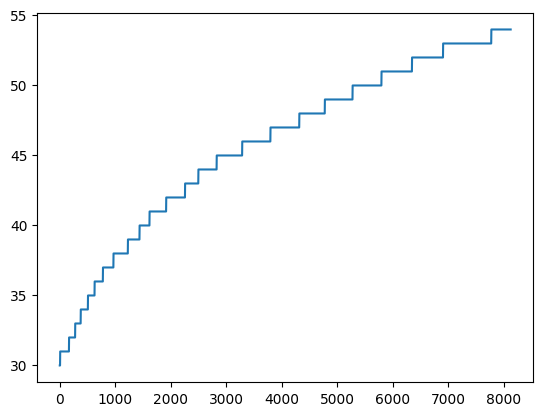

In [6]:
df["battery_temperature_f"].plot(kind="line")
plt.show()

In [7]:
print(df["latitude"].iloc[-1])
print(df["latitude"][0])

36.55902834
36.55903738


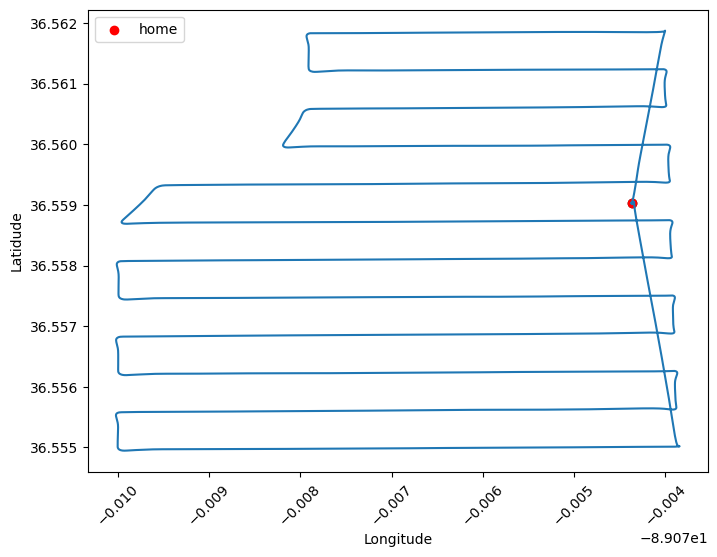

In [8]:
plt.figure(figsize=(8,6))
plt.plot(df["longitude"], df["latitude"])
plt.scatter(df["longitude"][0], df["latitude"][0], color="black")
plt.scatter(df["longitude"].iloc[-1], df["latitude"].iloc[-1], color="red", label="home")
plt.xlabel("Longitude")
plt.ylabel("Latidude")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [9]:
df.columns

Index(['time_millisecond', 'datetime_utc', 'latitude', 'longitude',
       'height_above_takeoff_feet',
       'height_above_ground_at_drone_location_feet',
       'ground_elevation_at_drone_location_feet',
       'altitude_above_sealevel_feet', 'height_sonar_feet', 'speed_mph',
       'distance_feet', 'mileage_feet', 'satellites', 'gpslevel', 'voltage_v',
       'max_altitude_feet', 'max_ascent_feet', 'max_speed_mph',
       'max_distance_feet', 'xspeed_mph', 'yspeed_mph', 'zspeed_mph',
       'compass_heading_degrees', 'pitch_degrees', 'roll_degrees', 'isphoto',
       'isvideo', 'rc_elevator', 'rc_aileron', 'rc_throttle', 'rc_rudder',
       'rc_elevator_percent', 'rc_aileron_percent', 'rc_throttle_percent',
       'rc_rudder_percent', 'gimbal_heading_degrees', 'gimbal_pitch_degrees',
       'gimbal_roll_degrees', 'battery_percent', 'voltagecell1',
       'voltagecell2', 'voltagecell3', 'voltagecell4', 'voltagecell5',
       'voltagecell6', 'current_a', 'battery_temperature_f', 'alt

In [10]:
df_selected = df[["battery_temperature_f", "max_speed_mph",'battery_percent','current_a','mileage_feet']]

In [11]:
dfcorr = df_selected.corr() 

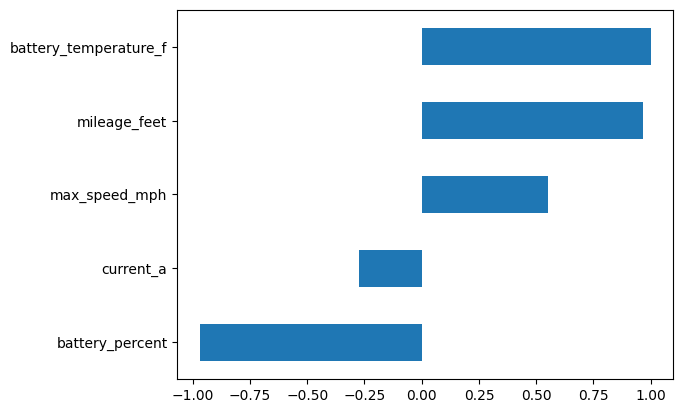

In [12]:
dfcorr["battery_temperature_f"].sort_values(ascending=True).plot(kind="barh")
plt.show()

In [13]:
df.shape

(8127, 52)

In [14]:
df_clean = df.loc[:,~df.columns.str.startswith("voltage")]


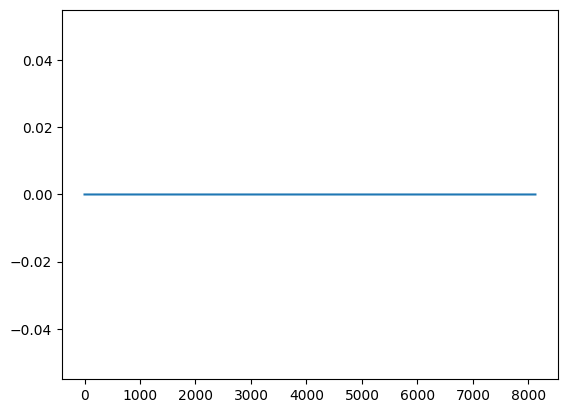

In [15]:
df["isvideo"].plot(kind="line")
plt.show()

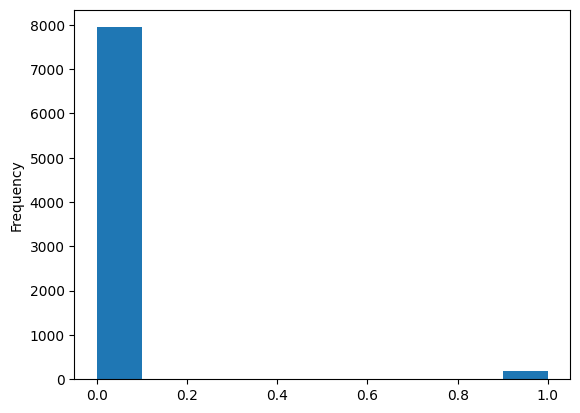

In [16]:
df["isphoto"].plot(kind="hist")
plt.show()

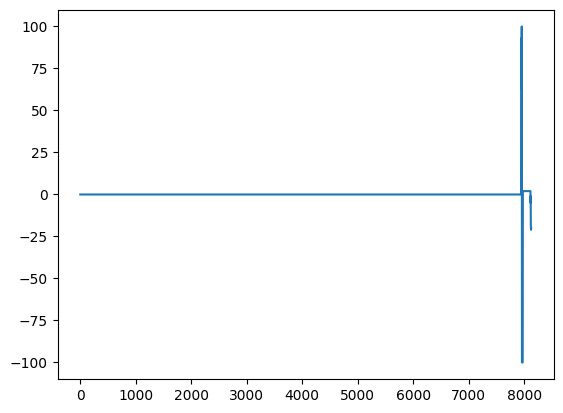

In [17]:
df["rc_aileron_percent"].plot(kind="line")
plt.show()

In [18]:
df_clean["flycstate"].unique()

array(['Waypoint', 'P-GPS', 'AutoLanding', 'Sport'], dtype=object)

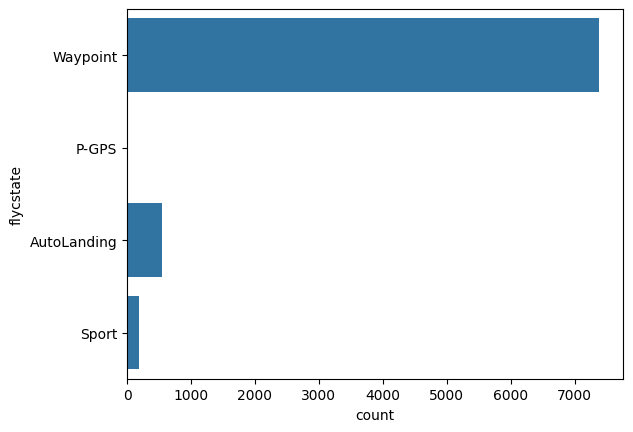

In [19]:
sns.countplot(data=df_clean["flycstate"])
plt.show()

In [20]:
df_clean.head()

,time_millisecond,datetime_utc,latitude,longitude,height_above_takeoff_feet,height_above_ground_at_drone_location_feet,ground_elevation_at_drone_location_feet,altitude_above_sealevel_feet,height_sonar_feet,speed_mph,...,gimbal_pitch_degrees,gimbal_roll_degrees,battery_percent,current_a,battery_temperature_f,altitude_feet,ascent_feet,flycstateraw,flycstate,message
0,5510,3/16/2022 18:39,36.559037,-89.074368,29.855644,29.855644,367.743461,397.599105,0,0.000000,...,-90.0,0,93,15.88,29.950016,397.599105,29.855644,14,Waypoint,NaN
1,5610,3/16/2022 18:39,36.559037,-89.074368,30.839896,30.839896,367.743461,398.583357,0,0.000000,...,-90.0,0,93,15.88,29.950016,398.583357,30.839896,14,Waypoint,Mission did take off
2,5710,3/16/2022 18:39,36.559037,-89.074368,31.824148,31.824148,367.743461,399.567609,0,0.000000,...,-90.0,0,93,15.88,29.950016,399.567609,31.824148,14,Waypoint,NaN
3,5810,3/16/2022 18:39,36.559037,-89.074367,32.808400,32.808400,367.743461,400.551861,0,0.000000,...,-90.0,0,93,15.88,29.950016,400.551861,32.808400,14,Waypoint,NaN
4,5910,3/16/2022 18:39,36.559037,-89.074367,33.792652,33.792652,367.743461,401.536113,0,0.223694,...,-89.9,0,93,15.88,29.950016,401.536113,33.792652,14,Waypoint,NaN


In [21]:
dfx = df_clean.copy()

dfy = dfx.drop(columns=["datetime_utc", "message", "flycstate"])

In [22]:
dfy.head(3)

,time_millisecond,latitude,longitude,height_above_takeoff_feet,height_above_ground_at_drone_location_feet,ground_elevation_at_drone_location_feet,altitude_above_sealevel_feet,height_sonar_feet,speed_mph,distance_feet,...,rc_rudder_percent,gimbal_heading_degrees,gimbal_pitch_degrees,gimbal_roll_degrees,battery_percent,current_a,battery_temperature_f,altitude_feet,ascent_feet,flycstateraw
0,5510,36.559037,-89.074368,29.855644,29.855644,367.743461,397.599105,0,0.0,0.000000,...,0,254.4,-90.0,0,93,15.88,29.950016,397.599105,29.855644,14
1,5610,36.559037,-89.074368,30.839896,30.839896,367.743461,398.583357,0,0.0,0.047036,...,0,254.4,-90.0,0,93,15.88,29.950016,398.583357,30.839896,14
2,5710,36.559037,-89.074368,31.824148,31.824148,367.743461,399.567609,0,0.0,0.095541,...,0,254.4,-90.0,0,93,15.88,29.950016,399.567609,31.824148,14


In [ ]:
# dfy.to_pickle("combined.pkl")

# PCA 🎃❌

In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("pca", PCA(n_components=2))])

pta = pipe.fit_transform(dfy)
pcadf = pd.DataFrame(pta, columns=["PC1", "PC2"])

In [25]:
fly_state = df_clean["flycstate"].values
pcadf["flystate"] = fly_state

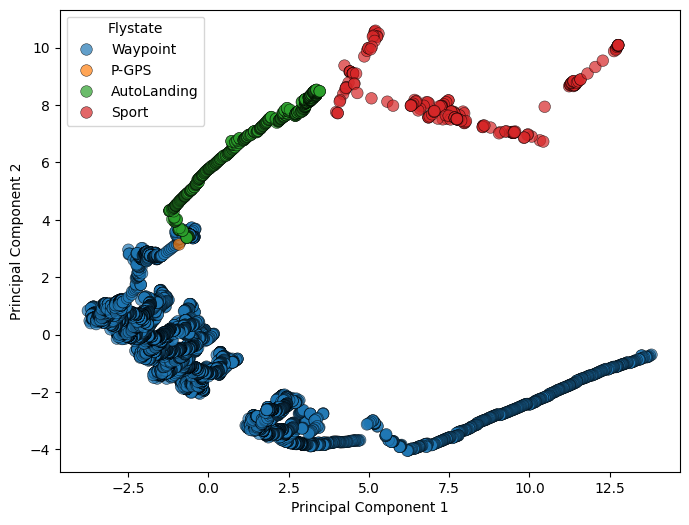

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pcadf, x="PC1", y="PC2", 
                hue="flystate",
                edgecolor="black",
                alpha=0.7,
                linewidth=0.4,
                s=70)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Flystate", loc="best")
plt.show()

# Modeeling 🍓❌

In [27]:
from sklearn.ensemble import StackingRegressor, StackingClassifier
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cross_decomposition import PLSRegression

In [28]:
dfy.head(3)

,time_millisecond,latitude,longitude,height_above_takeoff_feet,height_above_ground_at_drone_location_feet,ground_elevation_at_drone_location_feet,altitude_above_sealevel_feet,height_sonar_feet,speed_mph,distance_feet,...,rc_rudder_percent,gimbal_heading_degrees,gimbal_pitch_degrees,gimbal_roll_degrees,battery_percent,current_a,battery_temperature_f,altitude_feet,ascent_feet,flycstateraw
0,5510,36.559037,-89.074368,29.855644,29.855644,367.743461,397.599105,0,0.0,0.000000,...,0,254.4,-90.0,0,93,15.88,29.950016,397.599105,29.855644,14
1,5610,36.559037,-89.074368,30.839896,30.839896,367.743461,398.583357,0,0.0,0.047036,...,0,254.4,-90.0,0,93,15.88,29.950016,398.583357,30.839896,14
2,5710,36.559037,-89.074368,31.824148,31.824148,367.743461,399.567609,0,0.0,0.095541,...,0,254.4,-90.0,0,93,15.88,29.950016,399.567609,31.824148,14


In [29]:
X = dfy.drop(columns=["battery_temperature_f"]).values
y = dfy["battery_temperature_f"].values

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LassoCV, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [31]:
lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=0.01, random_state=42))
])

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [32]:
estimators = [
    ("lasso", lasso),
    ("rf", rf),
    ("xgb", xgb)
]


In [33]:
stack = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0),
    cv=5,                
    n_jobs=-1,
    passthrough=False    
)


In [34]:
stack.fit(X_train, y_train)


,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.","[('lasso', ...), ('rf', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA regressor which will be used to combine the base estimators.The default regressor is a :class:`~sklearn.linear_model.RidgeCV`.",Ridge()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",5
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",-1
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True


In [35]:
y_pred = stack.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R²: 0.9999423366591763
RMSE: 0.002200571397633663


In [36]:
models = {
    "Lasso": lasso,
    "Random Forest": rf,
    "XGBoost": xgb
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(
        name,
        "R²:",
        r2_score(y_test, pred)
    )


Lasso R²: 0.9953055839060767
Random Forest R²: 0.9999355569303697
XGBoost R²: 0.9999334133779403


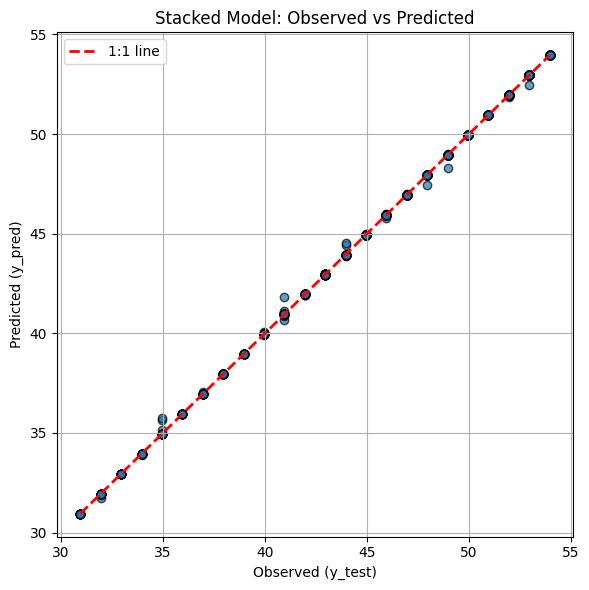

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Predict with stacked model
y_pred = stack.predict(X_test)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    linewidth=2,
    label="1:1 line"
)

plt.xlabel("Observed (y_test)")
plt.ylabel("Predicted (y_pred)")
plt.title("Stacked Model: Observed vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
xgb.fit(X_train, y_train)

import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)


c:\Users\Owner\facebook_marketplace\facebook_marketplace\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


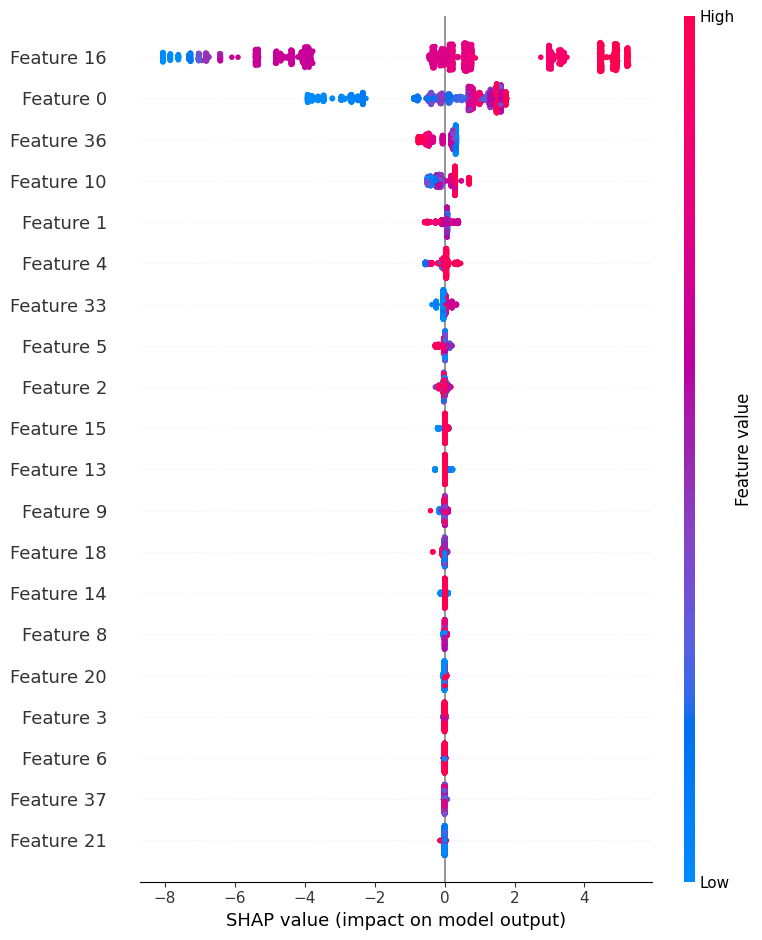

In [39]:
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="dot"
)
